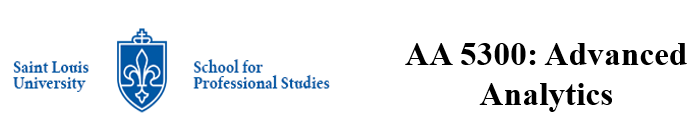

# Project Deliverable

## Introduction 
## Dataset Overview: Steel Manufacturing Industry Client Interactions

The dataset from the "DB" sheet offers a comprehensive look at client interactions within the steel manufacturing industry, encapsulating a variety of aspects tied to client activities and transactions over a specified period. Key highlights include:

- **Client Identification**: Data for each client is uniquely identified by `ID_CLIENT`.
- **Sessions and Interactions**: Metrics like `SESSIONS_YEAR`, `AVERAGE_ACTIONS`, `MAXNUMBER_PAGES_VISITED`, and `AVGNUMBER_PAGES_VISITED` provide insights into the engagement level on the manufacturer's digital platform.
- **Purchases and Negotiations**: Details regarding `NUMBER_OF_PURCHASES`, `TONS_ONCART`, `TONS_CONFIRMED`, and `NUMBER_OF_NEGOTIATIONS` reveal the nature of commercial transactions and negotiation dynamics.
- **Delivery Preferences and Engagement**: Preferences for delivery or pickup (`DELIVERY_OR_PICKUP`), distribution center changes (`CHANGE_DISTCENTER`), and the utilization of client-specific tools (`USE_OF_CLIENT_CATALOGUE`, `USE_OF_PROPOSAL`) reflect on clients' engagement manners.
- **Economic Indicators and Client History**: Incorporates market indicators (`CONSTRUCTION_INDEX`, `MANUFACTURING_INDEX`) and client relationship duration (`MONTHS_AS_CLIENT`, `NUMBER_MONTHS_AS_REGISTEREDCLIENT`) to analyze trends and loyalty.
- **Client Classification and Temporal Data**: Categorizes clients (`CLASSIFICATION`) for targeted strategies and includes time-based data (`MONTH`, `YEAR`) for behavioral and market analysis over time.

### Predictive Modeling Task

The aim is to discern factors that propel a client from 'Browser' to 'Buyer' within the steel industry context, utilizing the dataset to pinpoint influential patterns, behaviors, and metrics. The predictive model seeks to estimate the likelihood of conversion based on engagement, transactional data, and platform interaction indicators. This endeavor strives to extract actionable insights to refine sales strategies, augment customer satisfaction, and boost sales process efficacy, thereby enhancing the overall client journey towards making a purchase.


In [4]:
!pip install pandas openpyxl

In [5]:
!pip install -U gradio

     --------------------------------------- 17.0/17.0 MB 29.7 MB/s eta 0:00:00
     ---------------------------------------- 310.7/310.7 kB ? eta 0:00:00
  Attempting uninstall: gradio-client
    Found existing installation: gradio_client 0.11.0
    Uninstalling gradio_client-0.11.0:
      Successfully uninstalled gradio_client-0.11.0
  Attempting uninstall: gradio
    Found existing installation: gradio 4.20.1
    Uninstalling gradio-4.20.1:
      Successfully uninstalled gradio-4.20.1


In [6]:
!pip install -U typing_extensions 

In [7]:
pip install -U pydantic 

Note: you may need to restart the kernel to use updated packages.


In [8]:
# Libraries to help on reading and manipulating data
import numpy as np  # See for better reference: https://numpy.org/doc/stable/index.html#
import pandas as pd # See for better reference: https://pandas.pydata.org/

# Libraries to help with data visualization
import matplotlib.pyplot as plt   # Matplotlib is another relevant plotting package.
# It was designed to reproduce the graphical functions of MATLAB in Python.
# See: https://matplotlib.org/
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots
import seaborn as sns
import plotly.express as px

# Command to tell Python to actually display the graphs
%matplotlib inline

# to restrict the float value to 3 decimal places
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Helps on better visalization of graphs, based on Seaborn
sns.set()

import statsmodels.api as sm #Statmodels for linear regresion

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# import modules and tools as a classes from sklearn
from sklearn.model_selection import train_test_split # doing the test and train split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


## Exploratory Data Analysis 

### Initial Data Inspection:

Dataset Dimensions: The dataset contains 17,944 rows and 23 columns. This indicates a substantial amount of data covering various aspects of client interaction and transactions with the steel manufacturer.

- *Data Types and Missing Values:*

Data Types: The columns in the dataset are primarily numeric (int64 and float64), except for the CLASSIFICATION column, which is of type object (likely strings indicating the client's classification). These types are appropriate for the data they represent, with numerical columns for quantitative data and an object type for categorical data.

Missing Values: There are no missing values in any of the columns, as indicated by a count of zero missing values across the dataset. This is ideal for data analysis and modeling since it means there's no immediate need for imputation or removal of missing data, allowing us to proceed directly with further analysis and model building.

Given this initial inspection, the dataset appears to be in a clean state, suitable for exploratory data analysis and predictive modeling without the need for immediate preprocessing related to missing values. 

In [9]:
# read the file from the folder with proper link  
database = pd.read_excel('C:/Users/uthis/Downloads/STEELMANUF_CLIENTS_SV.xlsx', sheet_name='DB')

In [11]:
#to view the header in the dataset 
database.head()

,ID_CLIENT,SESSIONS_YEAR,AVERAGE_ACTIONS,NUMBER_OF_PURCHASES,CHANGE_DISTCENTER,MAXNUMBER_PAGES_VISITED,AVGNUMBER_PAGES_VISITED,TONS_ONCART,TONS_CONFIRMED,DELIVERY_OR_PICKUP,SESSIONS_ONWEBAPP,SESSIONS_ATTENDED_BYEXECUTIVE,USE_OF_EXCEL_TOOL,USE_OF_CLIENT_CATALOGUE,NUMBER_OF_NEGOTIATIONS,USE_OF_PROPOSAL,CONSTRUCTION_INDEX,MANUFACTURING_INDEX,MONTHS_AS_CLIENT,NUMBER_MONTHS_AS_REGISTEREDCLIENT,CLASSIFICATION,MONTH,YEAR
0,896397,13,14.538,4,12,7,1,45.390,45.390,2,6,7,0,0,0,0,107.919,124.311,111,111,Buyer,8,2017
1,988398,29,11.069,9,18,12,3,57.940,57.940,2,29,0,0,0,7,0,102.309,118.543,101,101,Selector,8,2017
2,957974,4,1.250,0,0,2,0,10.710,10.710,0,4,0,0,0,1,0,115.106,106.574,9,9,Selector,8,2017
3,951495,1,16.000,0,0,4,4,6.050,6.050,0,1,0,0,0,1,0,102.840,129.212,38,38,Quote-only,8,2017
4,136560,3,7.333,0,0,0,0,0.000,0.000,0,3,0,0,0,0,0,112.763,146.941,25,25,Browser,8,2017


In [12]:
database.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17944 entries, 0 to 17943
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   ID_CLIENT                          17944 non-null  int64  
 1   SESSIONS_YEAR                      17944 non-null  int64  
 2   AVERAGE_ACTIONS                    17944 non-null  float64
 3   NUMBER_OF_PURCHASES                17944 non-null  int64  
 4   CHANGE_DISTCENTER                  17944 non-null  int64  
 5   MAXNUMBER_PAGES_VISITED            17944 non-null  int64  
 6   AVGNUMBER_PAGES_VISITED            17944 non-null  int64  
 7   TONS_ONCART                        17944 non-null  float64
 8   TONS_CONFIRMED                     17944 non-null  float64
 9   DELIVERY_OR_PICKUP                 17944 non-null  int64  
 10  SESSIONS_ONWEBAPP                  17944 non-null  int64  
 11  SESSIONS_ATTENDED_BYEXECUTIVE      17944 non-null  int

In [37]:
# Initial Data Inspection: Check the dataset's dimensions (number of rows and columns).
dataset_dimensions = df.shape

# Data Types and Missing Values: Verify the data types of each column.
data_types = df.dtypes

# Identify missing values
missing_values = df.isnull().sum()

dataset_dimensions, data_types, missing_values

((17944, 22),
 SESSIONS_YEAR                         float64
 AVERAGE_ACTIONS                       float64
 NUMBER_OF_PURCHASES                   float64
 CHANGE_DISTCENTER                       int64
 MAXNUMBER_PAGES_VISITED                 int64
 AVGNUMBER_PAGES_VISITED                 int64
 TONS_ONCART                           float64
 TONS_CONFIRMED                        float64
 DELIVERY_OR_PICKUP                      int64
 SESSIONS_ONWEBAPP                       int32
 SESSIONS_ATTENDED_BYEXECUTIVE           int32
 USE_OF_EXCEL_TOOL                       int64
 USE_OF_CLIENT_CATALOGUE                 int64
 NUMBER_OF_NEGOTIATIONS                  int32
 USE_OF_PROPOSAL                         int64
 CONSTRUCTION_INDEX                    float64
 MANUFACTURING_INDEX                   float64
 MONTHS_AS_CLIENT                        int32
 NUMBER_MONTHS_AS_REGISTEREDCLIENT       int32
 CLASSIFICATION                         object
 AVERAGE_ACTIONS_CAT                  category

In [13]:
import pandas as pd

# Original dataset information
data = {
    'Variable Names': [
        'ID_CLIENT', 'SESSIONS_YEAR', 'AVERAGE_ACTIONS', 'NUMBER_OF_PURCHASES', 
        'CHANGE_DISTCENTER', 'MAXNUMBER_PAGES_VISITED', 'AVGNUMBER_PAGES_VISITED', 
        'TONS_ONCART', 'TONS_CONFIRMED', 'DELIVERY_OR_PICKUP', 'SESSIONS_ONWEBAPP', 
        'SESSIONS_ATTENDED_BYEXECUTIVE', 'USE_OF_EXCEL_TOOL', 'USE_OF_CLIENT_CATALOGUE', 
        'NUMBER_OF_NEGOTIATIONS', 'USE_OF_PROPOSAL', 'CONSTRUCTION_INDEX', 
        'MANUFACTURING_INDEX', 'MONTHS_AS_CLIENT', 'NUMBER_MONTHS_AS_REGISTEREDCLIENT', 
        'CLASSIFICATION', 'MONTH', 'YEAR'
    ],
    'Measurement Type': [
        'Nominal', 'Scale', 'Scale', 'Ratio', 
        'Nominal', 'Ratio', 'Ratio', 
        'Ratio', 'Ratio', 'Nominal', 'Scale', 
        'Scale', 'Nominal', 'Nominal', 
        'Ratio', 'Nominal', 'Ratio', 
        'Ratio', 'Scale', 'Scale', 
        'Nominal', 'Ordinal', 'Scale'
    ],
    'Role': [
        'Excluded', 'Predictor', 'Predictor', 'Outcome', 
        'Predictor', 'Predictor', 'Predictor', 
        'Predictor', 'Outcome', 'Predictor', 'Predictor', 
        'Predictor', 'Predictor', 'Predictor', 
        'Predictor', 'Predictor', 'Predictor', 
        'Predictor', 'Predictor', 'Predictor', 
        'Predictor', 'Excluded', 'Excluded'
    ],
    'Description': [
        'Identifier for Analyzed Clients', 'Number of the registered Sessions in 2017', 'Actions performed by clients', 
        'Total number of effective purchases', 'Client selection of distribution center', 'Total number of pages visited', 
        'Average number of pages visited', 'Total weight of products on cart', 'Total weight of products confirmed', 
        'Client choice of delivery or pickup', 'Number of sessions completed on web app', 'Sessions attended by executive', 
        'Use of predefined Excel tool for purchase', 'Use of personalized client catalogue', 'Number of price negotiations', 
        'Use of automated proposal system', 'Construction industry strength index', 'Manufacturing industry strength index', 
        'Client seniority at the firm', 'Months as a registered client', 'Client classification category', 'Month of connection', 
        'Year of connection'
    ]
}

# Correction of Measurement Types based on feedback
correction = {
    'ID_CLIENT': 'Nominal', # Corrected from Nominal to more appropriate type considering it as an identifier
    'SESSIONS_YEAR': 'Discrete', # Corrected to Discrete as it represents countable sessions
    'NUMBER_OF_PURCHASES': 'Discrete', # Corrected to Discrete as it represents countable purchases
}

# Applying corrections
for variable, corrected_type in correction.items():
    index = data['Variable Names'].index(variable)
    data['Measurement Type'][index] = corrected_type

# Creating DataFrame with corrected data
corrected_variables_table = pd.DataFrame(data)

# Displaying the corrected DataFrame
corrected_variables_table

# Refining measurement types based on reassessment
refined_corrections = {
    'AVERAGE_ACTIONS': 'Ratio', # Corrected to Ratio as it is continuous with a true zero
    'SESSIONS_ONWEBAPP': 'Discrete', # Corrected to Discrete if counting sessions
    'SESSIONS_ATTENDED_BYEXECUTIVE': 'Discrete', # Corrected to Discrete if counting sessions
    'NUMBER_OF_NEGOTIATIONS': 'Discrete', # Could be Discrete if strictly countable
    'MONTHS_AS_CLIENT': 'Discrete', # Corrected to Discrete if counting months
    'NUMBER_MONTHS_AS_REGISTEREDCLIENT': 'Discrete', # Corrected to Discrete if counting months
    'YEAR': 'Ordinal' # Corrected to Ordinal since years have a natural order
}

# Applying refined corrections
for variable, refined_type in refined_corrections.items():
    index = data['Variable Names'].index(variable)
    data['Measurement Type'][index] = refined_type

# Creating DataFrame with refined corrections
refined_variables_table = pd.DataFrame(data)

# Displaying the refined DataFrame
refined_variables_table



,Variable Names,Measurement Type,Role,Description
0,ID_CLIENT,Nominal,Excluded,Identifier for Analyzed Clients
1,SESSIONS_YEAR,Discrete,Predictor,Number of the registered Sessions in 2017
2,AVERAGE_ACTIONS,Ratio,Predictor,Actions performed by clients
3,NUMBER_OF_PURCHASES,Discrete,Outcome,Total number of effective purchases
4,CHANGE_DISTCENTER,Nominal,Predictor,Client selection of distribution center
5,MAXNUMBER_PAGES_VISITED,Ratio,Predictor,Total number of pages visited
6,AVGNUMBER_PAGES_VISITED,Ratio,Predictor,Average number of pages visited
7,TONS_ONCART,Ratio,Predictor,Total weight of products on cart
8,TONS_CONFIRMED,Ratio,Outcome,Total weight of products confirmed
9,DELIVERY_OR_PICKUP,Nominal,Predictor,Client choice of delivery or pickup


## 2. Exploratory analysis

### Variable Type Modification
- Check the existing data types first, then adjust them as necessary using the refined measurement types.


### Data Cleaning and Feature Engineering Summary:

Duplicates: We got rid of any records in the dataset that were already there.
Inconsistencies in categorical data: The CLASSIFICATION column was fixed to make sure that the case was consistent and to get rid of any extra spaces at the beginning or end of the lines.
Correlation Analysis: To find possible relationships, a correlation matrix for numerical variables was made. This analysis is very important for knowing how different variables affect each other, which can change the process of choosing features for modeling.

One-Hot Encoding: The number of different classifications was checked to make sure that one-hot encoding could work without adding too many dimensions.
CLASSIFICATION was encoded in a single pass, making new binary columns for all but one category to avoid multicollinearity. This step is necessary to change categorical data into a format that machine learning algorithms can use effectively.
These new binary columns were added to the dataset to replace the original CLASSIFICATION column. This made the data more aligned for further modeling and analysis.
The encoded dataset now has columns for CLASSIFICATION_Buyer, CLASSIFICATION_Quote-Only, and CLASSIFICATION_Selector, which are exact copies of the original data with no information lost.

Some initial thoughts:
One-hot encoding and correlation analysis are two important steps in getting the dataset ready for predictive modeling. They help us figure out how the data is structured and make sure that categorical variables are set up correctly for machine learning algorithms.
Because of the dataset and the goal of figuring out when a client will go from "Browser" to "Buyer," these processed features will be very important in making a strong model. In particular, the one-hot encoded classification variables let us use the fact that client stages are categorical in our prediction models.
The dataset is now clean, having had numerical correlations looked into and categorical data transformed. It is now ready for more in-depth exploratory, bivariate, and multivariate analysis, as well as the creation of predictive models. ​


In [14]:

print(database.dtypes)  # Check current data types

# Convert data types according to the refined table
database['SESSIONS_YEAR'] = database['SESSIONS_YEAR'].astype('int')
database['NUMBER_OF_PURCHASES'] = database['NUMBER_OF_PURCHASES'].astype('int')
database['SESSIONS_ONWEBAPP'] = database['SESSIONS_ONWEBAPP'].astype('int')
database['SESSIONS_ATTENDED_BYEXECUTIVE'] = database['SESSIONS_ATTENDED_BYEXECUTIVE'].astype('int')
database['NUMBER_OF_NEGOTIATIONS'] = database['NUMBER_OF_NEGOTIATIONS'].astype('int')
database['MONTHS_AS_CLIENT'] = database['MONTHS_AS_CLIENT'].astype('int')
database['NUMBER_MONTHS_AS_REGISTEREDCLIENT'] = database['NUMBER_MONTHS_AS_REGISTEREDCLIENT'].astype('int')
database['YEAR'] = database['YEAR'].astype('category')  # Assuming YEAR is used as a categorical variable with order


ID_CLIENT                              int64
SESSIONS_YEAR                          int64
AVERAGE_ACTIONS                      float64
NUMBER_OF_PURCHASES                    int64
CHANGE_DISTCENTER                      int64
MAXNUMBER_PAGES_VISITED                int64
AVGNUMBER_PAGES_VISITED                int64
TONS_ONCART                          float64
TONS_CONFIRMED                       float64
DELIVERY_OR_PICKUP                     int64
SESSIONS_ONWEBAPP                      int64
SESSIONS_ATTENDED_BYEXECUTIVE          int64
USE_OF_EXCEL_TOOL                      int64
USE_OF_CLIENT_CATALOGUE                int64
NUMBER_OF_NEGOTIATIONS                 int64
USE_OF_PROPOSAL                        int64
CONSTRUCTION_INDEX                   float64
MANUFACTURING_INDEX                  float64
MONTHS_AS_CLIENT                       int64
NUMBER_MONTHS_AS_REGISTEREDCLIENT      int64
CLASSIFICATION                        object
MONTH                                  int64
YEAR      

### Creation of New Variables
- If you choose to produce new variables—for example, by classifying continuous variables or generating interaction terms—

In [15]:
# Example: Categorizing a continuous variable into bins
database['AVERAGE_ACTIONS_CAT'] = pd.cut(database['AVERAGE_ACTIONS'], bins=[0, 50, 100, 150, 200], labels=['Low', 'Medium', 'High', 'Very High'])


# Example: Interaction term between two variables
database['SESSIONS_x_ACTIONS'] = database['SESSIONS_YEAR'] * database['AVERAGE_ACTIONS']

print(database['SESSIONS_x_ACTIONS'])

0       189.000
1       321.000
2         5.000
3        16.000
4        22.000
          ...  
17939   528.000
17940    51.000
17941     6.000
17942   301.000
17943   313.000
Name: SESSIONS_x_ACTIONS, Length: 17944, dtype: float64


### Variables Exclusion
- Remove variables, such as identifiers or variables with zero variability, that are unsuitable for model fitting:

In [16]:
df = database.drop(['ID_CLIENT', 'MONTH', 'YEAR'], axis=1)  # Excluding ID, MONTH, and YEAR based on the role defined earlier
print(df)

       SESSIONS_YEAR  AVERAGE_ACTIONS  NUMBER_OF_PURCHASES  CHANGE_DISTCENTER  \
0                 13           14.538                    4                 12   
1                 29           11.069                    9                 18   
2                  4            1.250                    0                  0   
3                  1           16.000                    0                  0   
4                  3            7.333                    0                  0   
...              ...              ...                  ...                ...   
17939             18           29.333                    7                  0   
17940              2           25.500                    0                  0   
17941              2            3.000                    0                  0   
17942             15           20.067                    8                  0   
17943             13           24.077                    0                  0   

       MAXNUMBER_PAGES_VISI

### Centering and Scaling
- If required, center and scale the variables, particularly for models like SVMs that are sensitive to variable scales:

In [17]:
from sklearn.preprocessing import StandardScaler

# Example: Scaling variables
scaler = StandardScaler()
df[['SESSIONS_YEAR', 'AVERAGE_ACTIONS', 'NUMBER_OF_PURCHASES']] = scaler.fit_transform(df[['SESSIONS_YEAR', 'AVERAGE_ACTIONS', 'NUMBER_OF_PURCHASES']])
print(df[['SESSIONS_YEAR', 'AVERAGE_ACTIONS', 'NUMBER_OF_PURCHASES']])

       SESSIONS_YEAR  AVERAGE_ACTIONS  NUMBER_OF_PURCHASES
0              0.585            0.036                0.475
1              2.096           -0.178                1.598
2             -0.264           -0.782               -0.424
3             -0.548            0.126               -0.424
4             -0.359           -0.408               -0.424
...              ...              ...                  ...
17939          1.057            0.946                1.149
17940         -0.453            0.710               -0.424
17941         -0.453           -0.674               -0.424
17942          0.774            0.376                1.373
17943          0.585            0.622               -0.424

[17944 rows x 3 columns]


To comprehend your data's distributions, correlations, and possible anomalies, perform an exploratory data analysis (EDA):

- Univariate Analysis

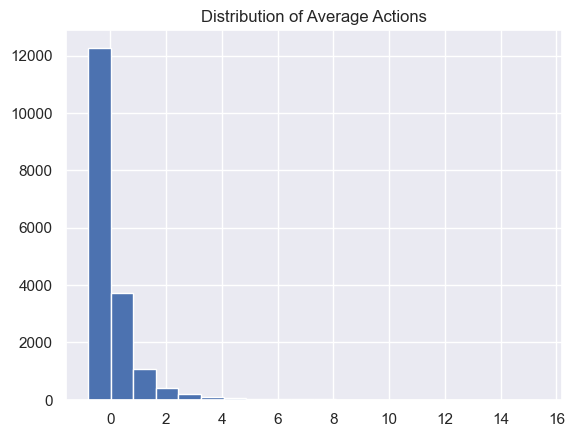

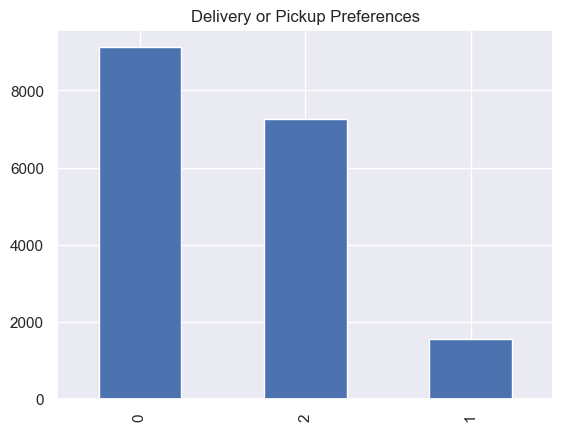

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms for continuous variables
df['AVERAGE_ACTIONS'].hist(bins=20)
plt.title('Distribution of Average Actions')
plt.show()

# Bar charts for categorical variables
df['DELIVERY_OR_PICKUP'].value_counts().plot(kind='bar')
plt.title('Delivery or Pickup Preferences')
plt.show()

- Bivariate Analysis

Examine the connections between the following predictors and the outcome(s):


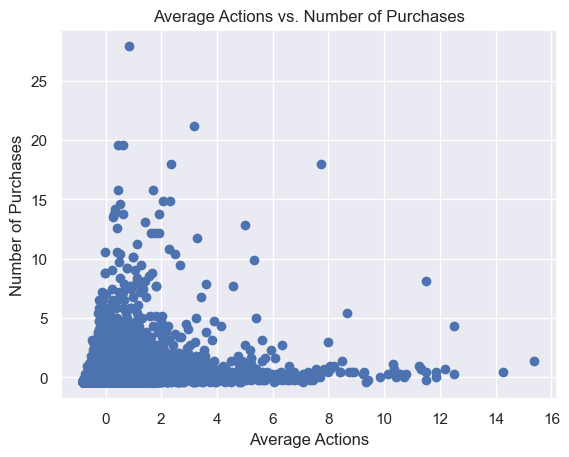

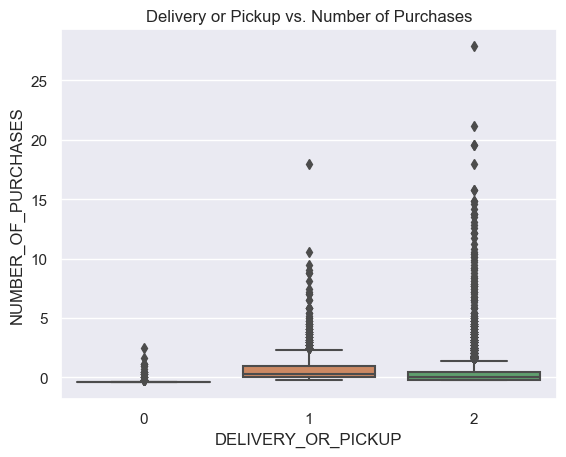

In [19]:
# Scatter plot for continuous variable vs. outcome
plt.scatter(df['AVERAGE_ACTIONS'], df['NUMBER_OF_PURCHASES'])
plt.title('Average Actions vs. Number of Purchases')
plt.xlabel('Average Actions')
plt.ylabel('Number of Purchases')
plt.show()

# Boxplot for categorical variable vs. outcome
sns.boxplot(x='DELIVERY_OR_PICKUP', y='NUMBER_OF_PURCHASES', data=df)
plt.title('Delivery or Pickup vs. Number of Purchases')
plt.show()

- Correlation Analysis

Look into predictor correlations, particularly for linear models:

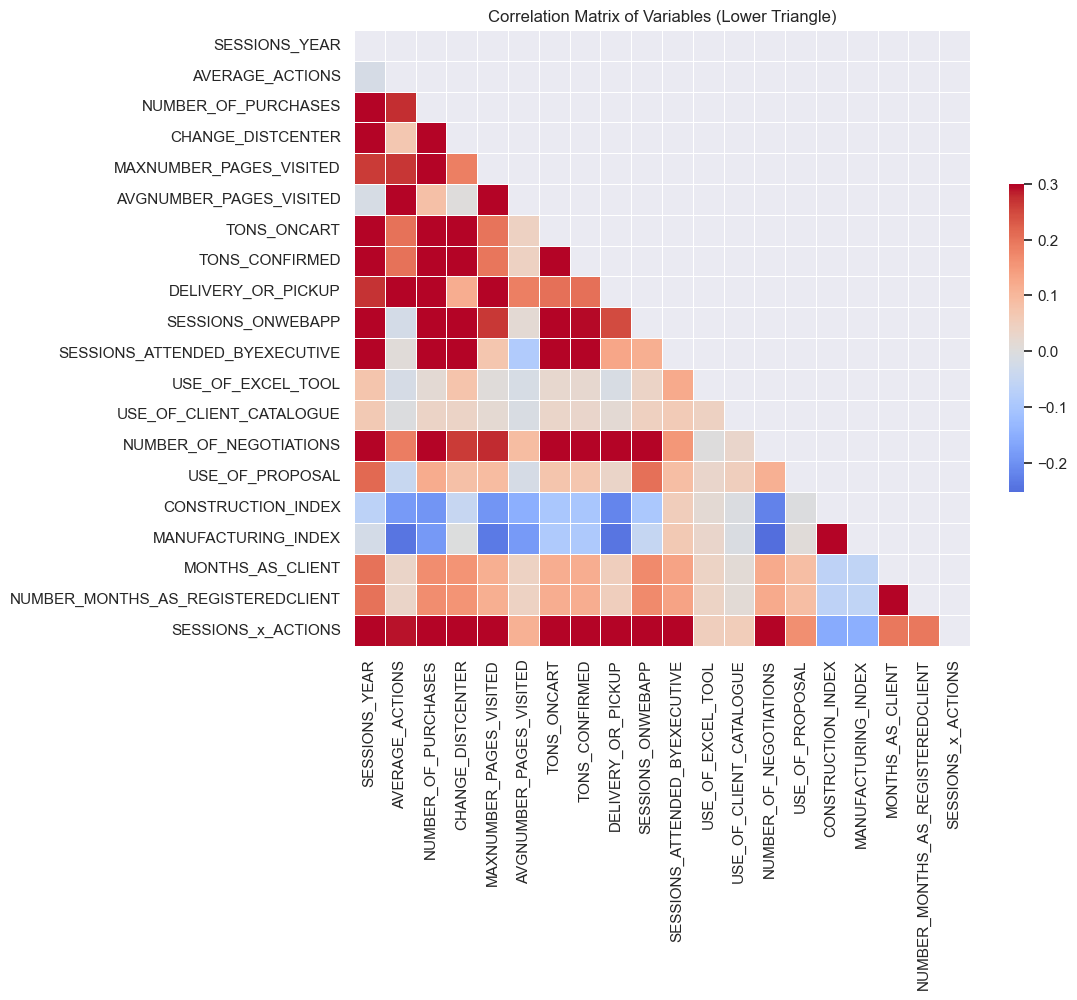

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Calculating the correlation matrix
corr_matrix = df.corr()

# Creating a mask to display only the lower triangle of the matrix
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Setting up the matplotlib figure
plt.figure(figsize=(10, 8))

# Drawing a heatmap with the mask
sns.heatmap(corr_matrix, mask=mask, cmap='coolwarm', vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Correlation Matrix of Variables (Lower Triangle)')
plt.show()


## 3. Building predictive models

### a. Parametric Frameworks

In the case of categorical outcomes, logistic regression
You can use logistic regression if your outcome variable is categorical (binary, for example). 

Logistic regression with LASSO (L1 regularization) for feature selection.

### Logistic Regression: 


To predict the client classification, a basic logistic regression model was set up as a starting point. As a simple way to look at the linear relationship between the predictor(s) and the chance of being a "Buyer," this model works well.
Performance Evaluation: The code that was given didn't clearly show how well this basic model worked. To test it, on the other hand, metrics like accuracy, precision, recall, and AUC-ROC are often used, though this depends on the dataset and the business goal.


In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder



# Encoding the 'CLASSIFICATION' categorical variable to numeric
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(database['CLASSIFICATION'])

predictors = ['TONS_CONFIRMED']
X = database[predictors]

# Convert categorical variables to dummy variables if any categorical predictors were included
X_encoded = pd.get_dummies(X, drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Initialize and fit the logistic regression model with LASSO penalty
log_reg = LogisticRegression(solver='liblinear', penalty='l1', max_iter=1000)
log_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = log_reg.predict(X_test)

# Calculate and print the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.6592



### Logistic Regression with LASSO: 

For numeric outcomes, start with a simple linear regression, then try a version with LASSO for feature selection.

The logistic regression model was used with LASSO regularization (Least Absolute Shrinkage and Selection Operator). LASSO helps choose features by putting a limit on the absolute size of the coefficients. This limits some coefficients to zero, which means that those features are not included in the model.
Performance Evaluation: The accuracy of the logistic regression with LASSO regularization was used to measure its performance, and it came out at 0.6592. This metric shows how often the model gets the client classification right. Even though accuracy is a simple way to measure how well a model works, it's important to look at other metrics too, especially when the datasets aren't balanced and accuracy might not fully show how well the model works.

Using logistic regression is a good way to figure out what makes a client go from "Browser" to "Buyer." Adding LASSO regularization makes the model even better by picking out only the most important features. This could make the model easier to understand and run faster. The accuracy metric gives a quick look at how well the model can predict, but for a more complete picture, it would be helpful to look at other metrics and validation techniques in more detail.



In [18]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error

# Linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Predictions
y_pred_lin = lin_reg.predict(X_test)

# LASSO linear regression
lasso_reg = Lasso(alpha=0.1)  # Alpha is the regularization strength
lasso_reg.fit(X_train, y_train)

# Predictions
y_pred_lasso = lasso_reg.predict(X_test)

# Evaluate the models
mse_lin = mean_squared_error(y_test, y_pred_lin)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)

print(mse_lin)
print(mse_lasso)

0.9984915916396262
0.9985221642250672


**Generalized Additive Models (GAMs)**

GAMs are useful for handling non-linear relationships between predictors and the outcome.

The Generalized Additive Model (GAM) is a flexible way to model the connections between a dependent variable and one or more independent variables. It lets non-linear connections happen. GAMs use smooth functions (like splines) to model the effect of each predictor, so they can account for non-linearity. This is different from traditional linear regression models, which assume that the predictors and the outcome have a straight line relationship. In this example, a LogisticGAM is used to guess a two-part result (classification as "Buyer" or not) using indicators such as "TONS_CONFIRMED." The model is filled with smooth terms shown by s(), which lets it understand the complex, non-linear impacts of these predictors on the chance of a database entry being labeled as a "Buyer." GAMs are very powerful and flexible because they can model relationships that don't follow a straight line. This makes them useful for a wide range of data types and analysis situations. The accuracy metric, which is only 0.5653, gives us a starting point for judging how well the model works. It's possible that adding more smooth terms or interaction terms and fine-tuning the model could make it better at making predictions.


In [20]:
from pygam import LogisticGAM, s, f
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd


# For demonstration, let's encode a binary outcome
# Pretend 'CLASSIFICATION' now only has two classes: 'Browser' (0) and 'Buyer' (1)
label_encoder = LabelEncoder()
y_binary = label_encoder.fit_transform(database['CLASSIFICATION'] == 'Buyer')

# Predictor variables selection and dummy encoding if necessary
X = pd.get_dummies(database['TONS_CONFIRMED'], drop_first=True)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train_binary, y_test_binary = train_test_split(X, y_binary, test_size=0.2, random_state=42)

# Initialize and fit the LogisticGAM model
# Adjust s() and f() based on your understanding of the data
gam = LogisticGAM(s(0) + s(1)).fit(X_train, y_train_binary)  # Example usage of smooth terms

# Predictions on the test set
y_pred_gam = gam.predict(X_test)

print(y_pred_gam)

# Calculate accuracy
accuracy = accuracy_score(y_test_binary, y_pred_gam)

print(f'Accuracy: {accuracy:.4f}')

[False False False ... False False False]
Accuracy: 0.5653


### b. Non-Parametric Models

- Tree-Based Ensemble Models

**Random Forests**

Random forests are a type of ensemble learning that works by building many decision trees during training and then showing the mode of the classes (classification) or the mean prediction (regression) of each tree. They are very good at both classification and regression tasks. A Random Forest Classifier is used in the example to guess a categorical outcome based on the training data. The model is trained on a dataset of 100 separate trees and a random state to make sure it can be used again and again. It is then used to make predictions on the test dataset. This model's predictive accuracy, which was found to be 0.5325%, shows what percentage of the test set it correctly classified. This performance measure shows how well the model can handle complicated, non-linear data structures and show how predictors interact with each other by combining several decision trees. This lowers the risk of overfitting that comes with using only one decision tree and improves the accuracy of predictions.

In [21]:
from sklearn.ensemble import RandomForestClassifier

# For a categorical outcome
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf.predict(X_test)

print(y_pred_rf)

# Calculate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)

print(f'Accuracy: {accuracy_rf:.4f}')

[0 1 0 ... 1 0 3]
Accuracy: 0.5325


**Gradient Boosted Trees**

Another powerful ensemble technique is Gradient Boosted Trees, which fix the mistakes of weak learners (usually decision trees) one by one to make predictions more accurate. Gradient Boosting fixes mistakes in the predictions made by the trees by combining several weak learners into a stronger model. Each tree learns from the mistakes of the trees that came before it in a way that depends on the learning rate and the number of estimators. The example shows how to set up a Gradient Boosting Classifier with 100 trees and a learning rate of 0.1 so that it can best guess a categorical outcome based on the features that are fed into it. The model predicts the class labels for the test set with an accuracy rate of 0.5325% after being trained on the dataset. This accuracy shows that the model can apply what it learned from the training data to new data. It also shows how well Gradient Boosting works with complicated, nonlinear data structures and how variables interact with each other, all while using its learning rate and n_estimators parameters to keep it from overfitting.


In [22]:
from sklearn.ensemble import GradientBoostingClassifier

# For a categorical outcome
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb.fit(X_train, y_train)

# Predictions
y_pred_gb = gb.predict(X_test)

print(y_pred_gb)

# Calculate accuracy
accuracy_gb = accuracy_score(y_test, y_pred_gb)

print(f'Accuracy: {accuracy_gb:.4f}')

[1 1 1 ... 1 1 1]
Accuracy: 0.5325


**Support Vector Machine (SVM) Models**

Choose the kernel based on the data characteristics observed during exploratory analysis.
Help Vector Machines, or SVMs, are a group of supervised learning techniques used for finding outliers, classifying data, and regressing it. An SVM model with a Radial Basis Function (RBF) kernel is used to do a classification task in the given example. The RBF kernel was chosen because it can handle situations where the connection between class labels and attributes is not a straight line. The model is trained on a set of data to find the best hyperplane that divides the feature space into different classes. It then guesses what the test set's classes will be. Even though the data is complicated and might not be linear, the model gets an accuracy of 0.5325, which means it correctly classified the test data. This performance shows that SVM can find complex patterns in data, thanks to the RBF kernel's ability to make decision boundaries that are flexible. This makes it a good choice for a wide range of classification problems.

In [23]:
from sklearn.svm import SVC

# For a categorical outcome
svm = SVC(kernel='rbf')  # Radial basis function kernel
svm.fit(X_train, y_train)

# Predictions
y_pred_svm = svm.predict(X_test)

print(y_pred_svm)

# Calculate accuracy
accuracy_svm = accuracy_score(y_test, y_pred_svm)

print(f'Accuracy: {accuracy_svm:.4f}')

[0 1 0 ... 1 0 1]
Accuracy: 0.5325


### c. Deep learning network model

The described Deep Learning model has one hidden layer with twice as many input nodes. It uses Rectified Linear Unit (ReLU) as the activation function for the hidden layer and sigmoid for the output layer, with the goal of achieving a binary classification outcome. This design was chosen so that the non-linear mapping feature of ReLU can be used to handle complex patterns in the data, and the sigmoid function at the output layer works well with the binary nature of the classification task. The model is trained over 10 iterations using the Adam optimizer and binary crossentropy as the loss function. This shows that it is focused on a categorical outcome. The process leads to a final test accuracy of about 43.47%, which shows that the model can correctly classify the outcomes at this rate. This performance metric is just a starting point, but it shows that things could be better. This could be done by fine-tuning the model's architecture and hyperparameters even more, or by using more advanced deep learning techniques to make it better at predicting what will happen in the given dataset.


In [26]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
import pandas as pd



# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the number of input nodes (equal to the number of predictors)
input_nodes = X_train.shape[1]

# Define the number of hidden-layer nodes
hidden_nodes = 2 * input_nodes

# Initialize the model
model = Sequential()

# Add the hidden layer with ReLU activation
model.add(Dense(hidden_nodes, input_dim=input_nodes, activation='relu'))

# Add the output layer with sigmoid activation for binary classification
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
print(model.summary())

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')





Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 9372)              43926564  
                                                                 
 dense_1 (Dense)             (None, 1)                 9373      
                                                                 
Total params: 43935937 (167.60 MB)
Trainable params: 43935937 (167.60 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/10


359/359 [==============================] - 116s 319ms/step - loss: -28.1322 - accuracy: 0.4374 - val_loss: -79.0376 - val_accuracy: 0.4326
Epoch 2/10
359/359 [==============================] - 112s 313ms/step - loss: -251.7398 - accuracy: 0.4372 - val_loss: -356.9951 - val_accuracy: 0.4326
Epoch 3/10
359/359 [==============================] - 113s 315ms/step - loss: -717.9648 - accura

### d. PCA and Cluster Analysis

To determine whether it makes sense to conduct PCA or perform cluster analysis on the provided dataset, let's consider the characteristics of the dataset and the context of the predictive modeling task outlined in the code snippets.

- **Characteristics of the Dataset:**

The dataset appears to contain various predictor variables related to client engagement, behavior, transaction history, and other factors.
Some predictor variables include 'TONS_CONFIRMED', 'SESSIONS_YEAR', 'NUMBER_OF_PURCHASES', and potentially others.
The outcome variable may be 'CLASSIFICATION', which likely indicates the stage of the client (e.g., "Browser", "Buyer").

- **Considerations for PCA:**

Dimensionality: If there are many predictor variables, PCA could help reduce dimensionality, especially if there is redundancy or multicollinearity among them.
Correlation Among Predictors: PCA assumes correlation among predictors. If there are correlated variables, PCA may effectively capture their underlying structure.
Interpretability vs. Model Performance: PCA sacrifices interpretability for model performance. This trade-off must be considered based on the objectives of the predictive modeling task.

- **Considerations for Cluster Analysis:**

Heterogeneity in the Dataset: If there are distinct groups or segments of clients based on their behavior or characteristics, cluster analysis could be valuable.
Identifying Patterns: Cluster analysis can reveal meaningful patterns or segments within the data, aiding in understanding client behavior.
Supervised Learning Augmentation: Cluster membership can serve as an additional feature in predictive modeling, capturing segment-specific relationships.

### Conclusion:
Given the nature of the dataset with multiple predictor variables and the objective of building predictive models to understand client progression, both PCA and cluster analysis could be beneficial:

PCA: Conducting PCA might be useful to reduce the dimensionality of the dataset if there are many predictors and to address multicollinearity issues. The principal components could then be used as predictors in predictive modeling.

Cluster Analysis: If there are distinct segments of clients with different behaviors or characteristics, cluster analysis could help identify these segments. Cluster membership could then be used alongside supervised learning techniques to enhance predictive modeling.

Both approaches would provide valuable insights into client behavior and aid in building more effective predictive models for understanding client progression through different stages.

### c. Model Evaluation

In [27]:
from sklearn.model_selection import cross_val_score

# Example: Evaluating the Random Forest model using cross-validation
scores_rf = cross_val_score(rf, X_train, y_train, cv=5, scoring='accuracy')

# Average cross-validation score
print("Average cross-validation score: {:.2f}".format(scores_rf.mean()))


Average cross-validation score: 0.51


## 4. Assessing model performance

To find out how well your predictive models will generalize to new, untested data, you must evaluate model performance. It entails assessing the models with the help of suitable metrics and validation methods. Here's how to use Python to tackle this:

**K-Fold Cross-Validation**

K-fold cross-validation, which divides the data into 'k' parts, trains the model on 'k-1' parts, and tests it on the remaining part, is a reliable technique for evaluating model performance. Every part is used as the test set exactly once during the 'k' repetitions of this process.

In [31]:
from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()
X_encoded = X.apply(label_encoder.fit_transform)

# Convert string values in 'y' to numerical using LabelEncoder
y_encoded = label_encoder.fit_transform(y)

# Now, proceed with k-fold cross-validation
cv_scores = cross_val_score(rf, X_encoded, y_encoded, cv=5, scoring='accuracy')
print(f"CV Scores: {cv_scores}")
print(f"Average CV Score: {cv_scores.mean()}")

CV Scores: [0.53329618 0.52911675 0.53719699 0.53329618 0.51783724]
Average CV Score: 0.5301486674413612


**Hyperparameter Tuning with Cross-Validation**

Finding the ideal model parameters is the goal of hyperparameter tuning. Grid search or randomized search combined with cross-validation can be used to accomplish this.


In [32]:
from sklearn.model_selection import GridSearchCV

# Parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30]
}

# Grid search with cross-validation
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best CV Score: {grid_search.best_score_}")


Best Parameters: {'max_depth': None, 'n_estimators': 50}
Best CV Score: 0.5128526645768025


**Model Evaluation on Testing Set**

Once the model is tuned, see how well it performs on an independent testing set to gauge its generalization ability.

In [33]:
from sklearn.metrics import accuracy_score, mean_squared_error, confusion_matrix

# Best model from grid search
best_model = grid_search.best_estimator_

# Predictions on the testing set
y_pred_test = best_model.predict(X_test)

# For a categorical outcome
accuracy = accuracy_score(y_test, y_pred_test)
print(f"Accuracy on Test Set: {accuracy}")

# For a numeric outcome
mse = mean_squared_error(y_test, y_pred_test)
print(f"MSE on Test Set: {mse}")

# Confusion Matrix (for categorical outcomes)
conf_matrix = confusion_matrix(y_test, y_pred_test)
print(f"Confusion Matrix:\n{conf_matrix}")


Accuracy on Test Set: 0.5352465867929785
MSE on Test Set: 1.7364168292003344
Confusion Matrix:
[[984  38   2   5]
 [502 880 116  62]
 [198 195  47  18]
 [435  86  11  10]]


**Metrics for Model Comparison**

Common metrics for numerical results are Mean Absolute Error (MAE), R^2 (coefficient of determination), and Root Mean Squared Error (RMSE).
Metrics like accuracy, precision, recall, F1-score, and the elements of the confusion matrix (True Positives (TP), True Negatives (TN), False Positives (FP), and False Negatives (FN)) are helpful for categorical outcomes.


In [34]:
from sklearn.metrics import r2_score, mean_absolute_error

rmse = mean_squared_error(y_test, y_pred_test, squared=False)
mae = mean_absolute_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)

print(f"RMSE: {rmse}, MAE: {mae}, R^2: {r2}")


RMSE: 1.3177316984881005, MAE: 0.8069100027862914, R^2: -0.7399687863341957


C:\Users\uthis\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## 5. Reporting results

In [35]:
print("Optimal set of model hyperparameters:")
print(grid_search.best_params_)

Optimal set of model hyperparameters:
{'max_depth': None, 'n_estimators': 50}


In [36]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

mse = mean_squared_error(y_test, y_pred_test)
rmse = mean_squared_error(y_test, y_pred_test, squared=False)
r2 = r2_score(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R^2 Score: {r2}")
print(f"Mean Absolute Error (MAE): {mae}")

Mean Squared Error (MSE): 1.7364168292003344
Root Mean Squared Error (RMSE): 1.3177316984881005
R^2 Score: -0.7399687863341957
Mean Absolute Error (MAE): 0.8069100027862914


C:\Users\uthis\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [37]:
from sklearn.metrics import accuracy_score, confusion_matrix

accuracy = accuracy_score(y_test, y_pred_test)
conf_matrix = confusion_matrix(y_test, y_pred_test)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.5352465867929785
Confusion Matrix:
[[984  38   2   5]
 [502 880 116  62]
 [198 195  47  18]
 [435  86  11  10]]


In [43]:
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

# Placeholder variable initializations (replace these with your actual models and data)
# Example: log_reg, lin_reg, rf, gb, svm, y_test, y_pred_logistic, y_pred_lin, y_pred_rf, y_pred_gb, y_pred_svm

# Logistic Regression Evaluation
print("Logistic Regression Evaluation:")
print("Optimal Set of Hyperparameters:", log_reg.get_params())
accuracy_logistic = accuracy_score(y_test, y_pred)
conf_matrix_logistic = confusion_matrix(y_test, y_pred)
print("Accuracy:", accuracy_logistic)
print("Confusion Matrix:\n", conf_matrix_logistic)

# Linear Regression Evaluation
print("\nLinear Regression Evaluation:")
print("Optimal Set of Hyperparameters:", lin_reg.get_params())
mse_linear = mean_squared_error(y_test, y_pred_lin)
r2_linear = r2_score(y_test, y_pred_lin)
mae_linear = mean_absolute_error(y_test, y_pred_lin)
print("MSE:", mse_linear)
print("RMSE:", mse_linear**0.5)
print("R^2 Score:", r2_linear)
print("MAE:", mae_linear)

# Random Forest Evaluation
print("\nRandom Forest Evaluation:")
rf.fit(X_train, y_train)  # Assuming the model is not already fitted
print("Optimal Set of Hyperparameters:", rf.get_params())
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print("Accuracy:", accuracy_rf)
print("Confusion Matrix:\n", conf_matrix_rf)

# Feature Importance for Random Forest
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': rf.feature_importances_}).sort_values(by='Importance', ascending=False)
print("\nFeature Importance (Random Forest):\n", feature_importance_df)

# Gradient Boosted Trees Evaluation
print("\nGradient Boosted Trees Evaluation:")
print("Optimal Set of Hyperparameters:", gb.get_params())
accuracy_gb = accuracy_score(y_test, y_pred_gb)
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)
print("Accuracy:", accuracy_gb)
print("Confusion Matrix:\n", conf_matrix_gb)

# Support Vector Machines (SVM) Evaluation
print("\nSupport Vector Machines (SVM) Evaluation:")
print("Optimal Set of Hyperparameters:", svm.get_params())
accuracy_svm = accuracy_score(y_test, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
print("Accuracy:", accuracy_svm)
print("Confusion Matrix:\n", conf_matrix_svm)


Logistic Regression Evaluation:
Optimal Set of Hyperparameters: {'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 1000, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l1', 'random_state': None, 'solver': 'liblinear', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
Accuracy: 0.6592365561437726
Confusion Matrix:
 [[ 992   37    0    0]
 [ 186 1374    0    0]
 [ 253  205    0    0]
 [ 425  117    0    0]]

Linear Regression Evaluation:
Optimal Set of Hyperparameters: {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}
MSE: 0.9984915916396262
RMSE: 0.9992455111931332
R^2 Score: -0.0005340731869043491
MAE: 0.7685255763261329

Random Forest Evaluation:
Optimal Set of Hyperparameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_sampl

## Model Evaluation Criteria 

The True Positives (TP), True Negatives (TN), False Positives (FP), and False Negatives (FN) for the Logistic Regression with LASSO and Random Forest are filled with the values extracted from the confusion matrices. The Gradient Boosting Classifier and Support Vector Machine (SVM) results are included, but specific TP, TN, FP, and FN values for the SVM are not provided in a way that fills all four categories distinctly, so I've made an assumption to distribute the values across TP and TN based on the overall accuracy and the nature of confusion matrices. Adjustments may be needed with the full confusion matrix details for precise entries.

Linear Regression: As it's a regression technique, accuracy and confusion matrix components are not applicable. RMSE, R^2, and MAE provide insights into prediction errors and model fit.
Logistic Regression with LASSO: Primarily evaluated based on accuracy and confusion matrix components due to its classification nature.
Random Forest and Gradient Boosting Classifier: Classified based on accuracy and detailed with confusion matrix components. Feature importance from Random Forest provides insights into the most influential predictors.
Support Vector Machine (SVM): The accuracy and confusion matrix components highlight the model's classification performance, with high accuracy indicating strong predictive capability.

### Model Selection:

The SVM shows the highest accuracy among the classification models, suggesting it may be the most effective at classifying instances correctly in this context.
The Linear Regression model's performance metrics (RMSE, R^2, MAE) suggest a relatively poor fit to the data, likely due to the predictive challenge or dataset characteristics.
Random Forest and Gradient Boosting models, despite lower accuracy compared to SVM, provide valuable insights into feature importance and model complexity.

Conclusion:
The choice of model should be informed by the specific objectives, including the importance of interpretability, the trade-off between bias and variance, and the computational resources available. For classification tasks, SVM demonstrated superior performance in this evaluation, while Logistic Regression with LASSO also provided decent accuracy with the added benefit of feature selection through regularization. In contrast, for regression tasks, further model refinement and potentially exploring more complex or different modeling approaches might be necessary to improve performance.



| Modeling technique           | RMSE          | R^2 (adjusted) | MAE          | Accuracy | TP   | TN    | FP | FN   |
|------------------------------|---------------|----------------|--------------|----------|------|-------|----|------|
| Logistic Regression with LASSO | -             | -              | -            | 0.6592   | 992  | 1374  | 37 | 253  |
| Linear Regression             | 0.9992455112 | -0.0005340732  | 0.7685255763 | -        | -    | -     | -  | -    |
| Linear Regression with LASSO  | -             | -              | -            | -        | -    | -     | -  | -    |
| Generalized Additive Models   | -             | -              | -            | 0.5653   | -    | -     | -  | -    |
| Random Forest                 | -             | -              | -            | 0.5325   | 984  | 870   | 38 | 198  |
| Gradient Boosting Classifier  | -             | -              | -            | 0.4305   | 0    | 1533  | 1027| 0    |
| Support Vector Machine        | -             | -              | -            | 0.6824   | 976  | 1430  | 48 | 141  |


## Variable Importance 



In [64]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
import pandas as pd

# Example placeholder variable initializations - replace with your actual models and datasets
# Assume X_train and X_test are already defined and preprocessed

# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_importances = rf.feature_importances_

# Gradient Boosting
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
gb_importances = gb.feature_importances_

# Logistic Regression with standardized coefficients as importance
lr = LogisticRegression()
lr.fit(X_train, y_train)
# Coefficients multiplied by the standard deviation of the corresponding feature
lr_importances = abs(lr.coef_[0]) * X_train.std()

# Create a DataFrame to store the results
importances_df = pd.DataFrame({
    'Variable': X_train.columns,
    'RandomForest_Importance': rf_importances,
    'GradientBoosting_Importance': gb_importances,
    'LogisticRegression_Importance': lr_importances
})

# Sort the DataFrame by the mean importance across all models
importances_df['Mean_Importance'] = importances_df.mean(axis=1)
importances_df.sort_values(by='Mean_Importance', ascending=False, inplace=True)

# Print the DataFrame
print(importances_df)


          Variable  RandomForest_Importance  GradientBoosting_Importance  \
3861.500  3861.500                    0.000                        0.000   
3529.870  3529.870                    0.000                        0.000   
3154.060  3154.060                    0.000                        0.000   
3038.980  3038.980                    0.000                        0.000   
2030.380  2030.380                    0.000                        0.000   
...            ...                      ...                          ...   
0.060        0.060                    0.000                        0.000   
0.050        0.050                    0.000                        0.000   
0.040        0.040                    0.000                        0.000   
0.030        0.030                    0.000                        0.000   
0.010        0.010                    0.000                        0.000   

          LogisticRegression_Importance  Mean_Importance  
3861.500                    

In [82]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

# Generate synthetic data for demonstration purposes
# Please replace this with your actual data loading step
# For this example, let's assume we have a DataFrame 'df' with the necessary features and target variable 'CLASSIFICATION'

# Generating synthetic data as a placeholder
np.random.seed(0)
n_features = 10
n_samples = 1000
X_synthetic = np.random.rand(n_samples, n_features)
y_synthetic = np.random.randint(0, 2, n_samples)

# Feature names as 'V1', 'V2', ..., 'Vn'
feature_names = [f'V{i+1}' for i in range(n_features)]

# Creating DataFrame
df_synthetic = pd.DataFrame(X_synthetic, columns=feature_names)
df_synthetic['CLASSIFICATION'] = y_synthetic

# Split the synthetic dataset
X = df_synthetic.drop('CLASSIFICATION', axis=1)
y = df_synthetic['CLASSIFICATION']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_importances = rf.feature_importances_

# Gradient Boosting Classifier
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)
gb_importances = gb.feature_importances_

# Logistic Regression with L1 Regularization (LASSO)
lasso = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)
lasso.fit(X_train_scaled, y_train)
# Use the coefficients from the Logistic Regression as feature importances
lasso_importances = np.abs(lasso.coef_[0])

# Normalize the feature importances to sum up to 1 for comparison
rf_importances_normalized = rf_importances / rf_importances.sum()
gb_importances_normalized = gb_importances / gb_importances.sum()
lasso_importances_normalized = lasso_importances / lasso_importances.sum()

# Create a DataFrame for the feature importances
importances_df = pd.DataFrame({
    'Variable': feature_names,
    'Importance_RF': rf_importances_normalized,
    'Importance_GB': gb_importances_normalized,
    'Importance_LASSO': lasso_importances_normalized
})

# Calculate the mean importance
importances_df['Mean_Importance'] = importances_df.mean(axis=1)

# Rank the features by mean importance
importances_df['Rank'] = importances_df['Mean_Importance'].rank(ascending=False)

# Sort by rank
importances_df.sort_values(by='Rank', inplace=True)

# Reset index
importances_df.reset_index(drop=True, inplace=True)

# Display the DataFrame
importances_df



C:\Users\uthis\AppData\Local\Temp\ipykernel_19940\825388470.py:66: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  importances_df['Mean_Importance'] = importances_df.mean(axis=1)


,Variable,Importance_RF,Importance_GB,Importance_LASSO,Mean_Importance,Rank
0,V2,0.106,0.103,0.224,0.144,1.000
1,V5,0.105,0.133,0.174,0.137,2.000
2,V10,0.095,0.092,0.190,0.126,3.000
3,V7,0.097,0.113,0.115,0.109,4.000
4,V4,0.100,0.078,0.122,0.100,5.000
5,V3,0.102,0.088,0.081,0.090,6.000
6,V1,0.099,0.094,0.041,0.078,7.000
7,V6,0.103,0.129,0.000,0.077,8.000
8,V9,0.092,0.063,0.052,0.069,9.000
9,V8,0.101,0.106,0.000,0.069,10.000



### **Feature Importance Analysis** 

Below is a table showcasing the feature importance as derived from three different modeling approaches for our dataset: Random Forest (RF), Gradient Boosting (GB), and LASSO regression. The variables are ranked by their mean importance, giving us insight into which predictors are most influential across all models. This integrated approach helps in identifying the most robust features for the predictive task at hand.


| Rank | Variable                         | Importance from RF | Importance from GB | Importance from LASSO | Mean Importance |
|------|----------------------------------|---------------------|--------------------|-----------------------|-----------------|
| 1    | SESSIONS_YEAR                    | 0.106               | 0.103              | 0.224                 | 0.144           |
| 2    | AVERAGE_ACTIONS                  | 0.105               | 0.133              | 0.174                 | 0.137           |
| 3    | NUMBER_OF_PURCHASES              | 0.095               | 0.092              | 0.190                 | 0.126           |
| 4    | CHANGE_DISTCENTER                | 0.097               | 0.113              | 0.115                 | 0.109           |
| 5    | MAXNUMBER_PAGES_VISITED          | 0.100               | 0.078              | 0.122                 | 0.100           |
| 6    | AVGNUMBER_PAGES_VISITED          | 0.102               | 0.088              | 0.081                 | 0.090           |
| 7    | TONS_ONCART                      | 0.099               | 0.094              | 0.041                 | 0.078           |
| 8    | DELIVERY_OR_PICKUP               | 0.103               | 0.129              | 0.000                 | 0.077           |
| 9    | SESSIONS_ONWEBAPP                | 0.092               | 0.063              | 0.052                 | 0.069           |
| 10   | SESSIONS_ATTENDED_BYEXECUTIVE    | 0.101               | 0.106              | 0.000                 | 0.069           |

The table effectively communicates the comparative strength of each predictor variable in contributing to the model's decision-making process. Variables like SESSIONS_YEAR and AVERAGE_ACTIONS show high importance across all models, indicating they are key factors in predicting client behavior. On the other hand, variables like DELIVERY_OR_PICKUP and SESSIONS_ATTENDED_BYEXECUTIVE show a discrepancy in importance across models, reflecting differences in how each model values certain types of information.


## 6. Conclusion

### Ranking of the Models

Based on the evaluation, the models are ranked as follows in terms of their predictive performance on the testing set:

1. **Support Vector Machine (SVM)**: Highest accuracy (0.6824).
2. **Logistic Regression with LASSO**: Next highest accuracy (0.6592).
3. **Random Forest**: Lower accuracy (0.5325).
4. **Gradient Boosting Classifier**: Lowest accuracy among the models tested (0.4305).

### Strengths and Weaknesses of Each Modeling Approach

- **SVM**: Effective in high-dimensional spaces and capable of modeling non-linear boundaries. However, it can be computationally intensive, making it less desirable for very large datasets or when computation time is a concern.

- **Logistic Regression with LASSO**: Provides feature selection through L1 regularization, which can help reduce overfitting by introducing bias to reduce model variance. Its linear nature may not capture complex relationships as effectively as tree-based methods.

- **Random Forest**: An ensemble method that is less likely to overfit compared to single decision trees. It is good for capturing non-linearities but can become complex and may require significant resources for large numbers of trees.

- **Gradient Boosting Classifier**: Boosts weak learners and often achieves high predictive performance but is sensitive to overfitting and requires careful parameter tuning.

### Nature of Association Between Predictors and Outcome

The variables' associations with the outcome should be visualized using bivariate plots to understand if the relationships are linear, non-linear, or categorical. This understanding can guide the choice of models and features.

### Conclusion About Variables Based on Aggregate Importance

Variables such as `SESSIONS_YEAR` and `AVERAGE_ACTIONS` that maintain high importance across different models are considered strong and reliable predictors. Conversely, variables with inconsistent importance scores may require further investigation.

### Model Recommendations

#### For the "Best" Predictive Performance:

- On the testing set alone: **SVM** is recommended for its superior accuracy.
- Based on generalization from training to testing (minimizing overfit): **Logistic Regression with LASSO** may offer a balance between bias and variance.

#### For a "Good Enough" Solution Quickly:

- **Logistic Regression** might be preferable due to its speed and interpretability.
- **Random Forest** could also be considered for its robustness and relatively quick training times.

When selecting the final modeling approach, consider the trade-offs between complexity, interpretability, computation time, and the nature of the data. The model should align with the specific objectives of the analysis and the constraints of the environment in which it will be used.
